<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/HPC_Logs/Analysis_of_Dataset_HPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git


Cloning into 'Project_DS'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 130 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (130/130), 15.83 MiB | 8.96 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/hpc_events_cleaned.csv")

In [ ]:
df

,time,alarmtimer:alarmtimer_cancel,alarmtimer:alarmtimer_fired,alarmtimer:alarmtimer_start,alarmtimer:alarmtimer_suspend,alignment-faults,ase_spec,block:block_bio_backmerge,block:block_bio_bounce,block:block_bio_complete,...,writeback:writeback_wait_iff_congested,writeback:writeback_wake_background,writeback:writeback_write_inode,writeback:writeback_write_inode_start,writeback:writeback_written,State,Attack,Attack-Group,Label,interface
0,5.004939,0,0,0,0,0,9029495,0,0,0,...,0,0,0,0,0,Charging,backdoor,host-attack,attack,any
1,10.064901,0,0,0,0,0,10016259,0,0,0,...,0,0,0,0,0,Charging,backdoor,host-attack,attack,any
2,15.120850,0,0,0,0,0,6899022,0,0,0,...,0,0,0,0,0,Charging,backdoor,host-attack,attack,any
3,20.180852,0,0,0,0,0,5553413,0,0,0,...,0,0,0,0,0,Charging,backdoor,host-attack,attack,any
4,25.240729,0,0,0,0,0,7368832,0,0,0,...,0,0,0,0,0,Charging,backdoor,host-attack,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,5808.438729,0,0,0,0,0,1333391,0,0,0,...,0,0,0,0,0,idle,backdoor,host-attack,attack,any
2296,5813.510716,0,0,0,0,0,1127358,0,0,0,...,0,0,0,0,0,idle,backdoor,host-attack,attack,any
2297,5818.574812,0,0,0,0,0,6370769,0,0,0,...,0,0,0,0,0,idle,backdoor,host-attack,attack,any
2298,5823.638711,0,0,0,0,0,7294614,0,0,0,...,0,0,0,0,0,idle,backdoor,host-attack,attack,any


In [ ]:
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
time                             float64
alarmtimer:alarmtimer_cancel       int64
alarmtimer:alarmtimer_fired        int64
alarmtimer:alarmtimer_start        int64
alarmtimer:alarmtimer_suspend      int64
                                  ...   
State                             object
Attack                            object
Attack-Group                      object
Label                             object
interface                         object
Length: 914, dtype: object


In [ ]:
# Separate columns by type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Display counts
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

# Display categorical column names
print("Categorical columns:")
print(categorical_cols.tolist())

Number of numerical columns: 909
Number of categorical columns: 5
Categorical columns:
['State', 'Attack', 'Attack-Group', 'Label', 'interface']


In [ ]:
# Loop through each categorical column and print unique values
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'State':
['Charging' 'idle']

Unique values in 'Attack':
['backdoor']

Unique values in 'Attack-Group':
['host-attack']

Unique values in 'Label':
['attack']

Unique values in 'interface':
['any']


In [ ]:
# Enhanced display with counts
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\nColumn: '{col}' — {len(unique_vals)} unique values")
    print(unique_vals)


Column: 'State' — 2 unique values
['Charging' 'idle']

Column: 'Attack' — 1 unique values
['backdoor']

Column: 'Attack-Group' — 1 unique values
['host-attack']

Column: 'Label' — 1 unique values
['attack']

Column: 'interface' — 1 unique values
['any']


In [ ]:
def check_zero_columns(df, name="HPC"):
    all_zero_cols = []
    mixed_cols = []

    for col in df.columns:
        # Skip categorical columns (object/string type)
        if df[col].dtype == 'object':
            continue

        # Check if column is all null
        if df[col].isnull().all():
            all_zero_cols.append(col)
        # Check if column is all 0
        elif (df[col] == 0).all():
            all_zero_cols.append(col)
        # Check if column has some 0 and some non-0
        elif (df[col] == 0).any():
            mixed_cols.append(col)

    print(f"\n--- {name} ---")
    print(f"Columns ALL zero/null ({len(all_zero_cols)}): {all_zero_cols}")
    print(f"Columns with MIXED values (zeros + non-zeros) ({len(mixed_cols)}): {mixed_cols}")

# Run for both datasets
check_zero_columns(df, "HPC Events")


--- HPC Events ---
Columns ALL zero/null (720): ['alarmtimer:alarmtimer_cancel', 'alarmtimer:alarmtimer_fired', 'alarmtimer:alarmtimer_start', 'alarmtimer:alarmtimer_suspend', 'alignment-faults', 'block:block_bio_backmerge', 'block:block_bio_bounce', 'block:block_bio_complete', 'block:block_bio_frontmerge', 'block:block_bio_queue', 'block:block_bio_remap', 'block:block_getrq', 'block:block_plug', 'block:block_rq_complete', 'block:block_rq_insert', 'block:block_rq_issue', 'block:block_rq_merge', 'block:block_rq_remap', 'block:block_rq_requeue', 'block:block_split', 'block:block_unplug', 'bpf-output', 'bus_access_shared', 'cid_write_retired', 'clk:clk_disable', 'clk:clk_disable_complete', 'clk:clk_enable', 'clk:clk_enable_complete', 'clk:clk_prepare', 'clk:clk_prepare_complete', 'clk:clk_set_duty_cycle', 'clk:clk_set_duty_cycle_complete', 'clk:clk_set_max_rate', 'clk:clk_set_min_rate', 'clk:clk_set_parent', 'clk:clk_set_parent_complete', 'clk:clk_set_phase', 'clk:clk_set_phase_complete'

In [ ]:
# Keep only columns that have at least one non-zero/non-null value
df_reduced = df.loc[:, (df != 0).any(axis=0)]
print(f"Original shape: {df.shape}, Reduced shape: {df_reduced.shape}")

df_idle = df_reduced[df_reduced['State'] == 'idle']
df_charging = df_reduced[df_reduced['State'] == 'Charging']

print("Idle shape:", df_idle.shape)
print("Charging shape:", df_charging.shape)

# Compute correlation matrices (only numeric columns)
corr_idle = df_idle.corr(numeric_only=True)
corr_charging = df_charging.corr(numeric_only=True)

# Absolute difference between correlations
corr_diff = (corr_charging - corr_idle).abs()

# Rank features by average difference
feature_importance = corr_diff.mean().sort_values(ascending=False)

print("Top 20 features with biggest correlation difference between Idle vs Charging:")
print(feature_importance.head(20))

Original shape: (2300, 914), Reduced shape: (2300, 194)
Idle shape: (1150, 194)
Charging shape: (1150, 194)
Top 20 features with biggest correlation difference between Idle vs Charging:
ipi:ipi_exit                                 0.507325
ipi:ipi_entry                                0.507313
ipi:ipi_raise                                0.507118
strex_fail_spec                              0.416121
net:net_dev_queue                            0.412659
qdisc:qdisc_dequeue                          0.412406
net:net_dev_start_xmit                       0.408136
net:net_dev_xmit                             0.408136
l1d_cache_inval                              0.332712
exc_irq                                      0.326319
dsb_spec                                     0.299201
l1d_cache_wb_clean                           0.273318
l2d_cache_wb_clean                           0.211203
irq:irq_handler_entry                        0.204075
irq:irq_handler_exit                         0.204074
l1i_

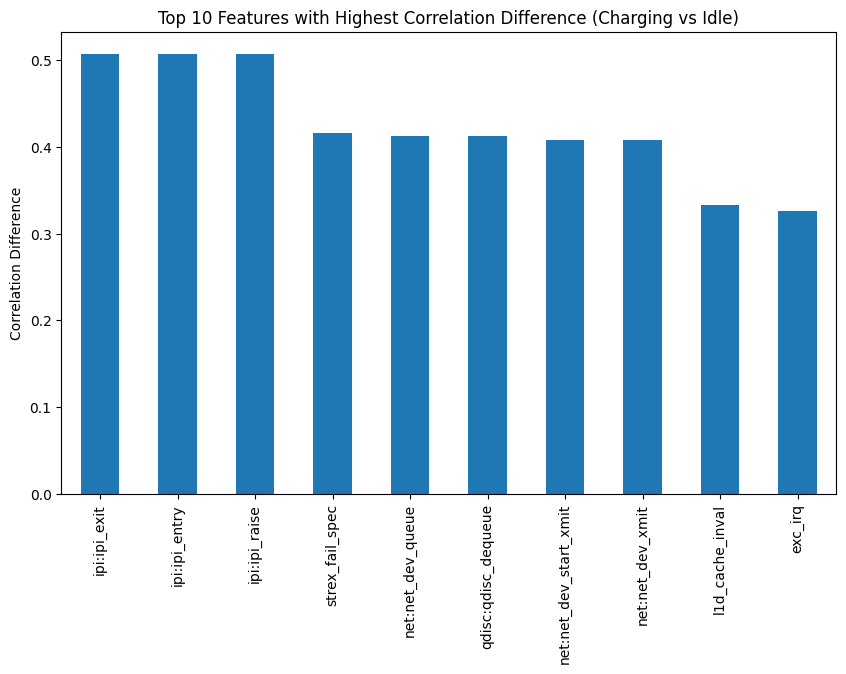

In [ ]:
import matplotlib.pyplot as plt

top_features = feature_importance.head(10).index

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Features with Highest Correlation Difference (Charging vs Idle)")
plt.ylabel("Correlation Difference")
plt.show()

In [ ]:
df_reduced

,time,ase_spec,block:block_dirty_buffer,block:block_touch_buffer,br_immed_spec,br_indirect_spec,br_mis_pred,br_pred,br_return_spec,branch-load-misses,...,vfp_spec,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_start,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,State,Attack,Attack-Group,Label,interface
0,5.004939,9029495,1929,8261,1678952554,303299535,66542962,1868029046,213301478,66095843,...,343006,2315,2315,1277,3592,Charging,backdoor,host-attack,attack,any
1,10.064901,10016259,1051,7013,1666190361,340888773,54385487,1804351108,234862246,59483337,...,256981,1083,1083,0,1919,Charging,backdoor,host-attack,attack,any
2,15.120850,6899022,1764,5287,1119854098,221931792,45379062,1333747556,152076203,47066188,...,262985,2264,2264,1186,3450,Charging,backdoor,host-attack,attack,any
3,20.180852,5553413,0,4082,891012454,187291331,30784154,960199295,135489185,32331880,...,258282,0,0,0,0,Charging,backdoor,host-attack,attack,any
4,25.240729,7368832,0,3952,828411568,168333323,31492308,954315338,116279093,27029351,...,240410,0,0,0,0,Charging,backdoor,host-attack,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,5808.438729,1333391,0,4870,548448137,125712403,20045463,774606880,91566919,13196694,...,20620,1116,1116,0,1530,idle,backdoor,host-attack,attack,any
2296,5813.510716,1127358,1385,7317,731303591,166917862,27275497,812761658,126554805,29088235,...,58625,1433,1433,0,2414,idle,backdoor,host-attack,attack,any
2297,5818.574812,6370769,1805,5235,903465922,167198249,29508476,970623760,119869529,29286778,...,32414,2188,2188,1240,3428,idle,backdoor,host-attack,attack,any
2298,5823.638711,7294614,0,4132,1125273818,226655745,32101953,1242123316,168648139,30566152,...,64175,0,0,0,0,idle,backdoor,host-attack,attack,any


In [ ]:
df_charging

,time,ase_spec,block:block_dirty_buffer,block:block_touch_buffer,br_immed_spec,br_indirect_spec,br_mis_pred,br_pred,br_return_spec,branch-load-misses,...,vfp_spec,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_start,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,State,Attack,Attack-Group,Label,interface
0,5.004939,9029495,1929,8261,1678952554,303299535,66542962,1868029046,213301478,66095843,...,343006,2315,2315,1277,3592,Charging,backdoor,host-attack,attack,any
1,10.064901,10016259,1051,7013,1666190361,340888773,54385487,1804351108,234862246,59483337,...,256981,1083,1083,0,1919,Charging,backdoor,host-attack,attack,any
2,15.120850,6899022,1764,5287,1119854098,221931792,45379062,1333747556,152076203,47066188,...,262985,2264,2264,1186,3450,Charging,backdoor,host-attack,attack,any
3,20.180852,5553413,0,4082,891012454,187291331,30784154,960199295,135489185,32331880,...,258282,0,0,0,0,Charging,backdoor,host-attack,attack,any
4,25.240729,7368832,0,3952,828411568,168333323,31492308,954315338,116279093,27029351,...,240410,0,0,0,0,Charging,backdoor,host-attack,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,5805.836784,6155339,1866,8036,1314735466,265895184,52944490,1707605906,194098613,47915214,...,288841,2226,2226,1240,3466,Charging,backdoor,host-attack,attack,any
1146,5810.892888,7538806,1840,5317,1244222495,257359463,52217826,1498867596,185315125,62077747,...,290013,2237,2237,1261,3498,Charging,backdoor,host-attack,attack,any
1147,5815.948736,9767441,0,3560,1233703326,246355116,41473325,1282729289,171453405,42434252,...,247129,0,0,0,0,Charging,backdoor,host-attack,attack,any
1148,5821.009147,9683961,1820,5367,1642626755,332658048,61155331,1919056144,230201799,62354899,...,288814,2315,2315,1168,3483,Charging,backdoor,host-attack,attack,any


In [ ]:
df_idle

,time,ase_spec,block:block_dirty_buffer,block:block_touch_buffer,br_immed_spec,br_indirect_spec,br_mis_pred,br_pred,br_return_spec,branch-load-misses,...,vfp_spec,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_start,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,State,Attack,Attack-Group,Label,interface
1150,5.002779,1847211,0,3594,609162645,107957905,23347951,725350555,69643159,26306361,...,47529,0,0,0,0,idle,backdoor,host-attack,attack,any
1151,10.058729,8281500,1784,5310,1008864616,181194895,37278852,1294829383,129620684,43180140,...,19825,2250,2250,1194,3444,idle,backdoor,host-attack,attack,any
1152,15.126750,1434558,0,3634,481133665,102030188,14710199,471184153,72378229,15130341,...,27004,0,0,0,0,idle,backdoor,host-attack,attack,any
1153,20.194730,1994876,1675,5181,348850219,78552471,13827907,504725568,57721920,14269069,...,19739,2073,2073,1139,3212,idle,backdoor,host-attack,attack,any
1154,25.250690,8162301,1810,5288,1074189088,188165186,41988565,1294118301,138437565,37944567,...,49107,2354,2354,1173,3527,idle,backdoor,host-attack,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,5808.438729,1333391,0,4870,548448137,125712403,20045463,774606880,91566919,13196694,...,20620,1116,1116,0,1530,idle,backdoor,host-attack,attack,any
2296,5813.510716,1127358,1385,7317,731303591,166917862,27275497,812761658,126554805,29088235,...,58625,1433,1433,0,2414,idle,backdoor,host-attack,attack,any
2297,5818.574812,6370769,1805,5235,903465922,167198249,29508476,970623760,119869529,29286778,...,32414,2188,2188,1240,3428,idle,backdoor,host-attack,attack,any
2298,5823.638711,7294614,0,4132,1125273818,226655745,32101953,1242123316,168648139,30566152,...,64175,0,0,0,0,idle,backdoor,host-attack,attack,any


In [ ]:
corr_idle = df_idle.corr(numeric_only=True).abs()
corr_charging = df_charging.corr(numeric_only=True).abs()

In [ ]:
def get_high_corr_columns(corr_matrix, threshold=0.95):
    upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
    return [col for col in upper_tri.columns if any(upper_tri[col] > threshold)]

high_corr_idle = get_high_corr_columns(corr_idle)
high_corr_charging = get_high_corr_columns(corr_charging)

print("Highly correlated columns in Idle state:", high_corr_idle)
print("Highly correlated columns in Charging state:", high_corr_charging)

Highly correlated columns in Idle state: ['br_indirect_spec', 'br_pred', 'br_return_spec', 'branch-loads', 'bus_access_not_shared', 'bus_access_rd', 'bus_access_wr', 'bus_cycles', 'bus-cycles', 'cache-references', 'context-switches', 'cpu_cycles', 'cpu-cycles', 'dTLB-store-misses', 'exc_taken', 'inst_spec', 'ipi:ipi_entry', 'ipi:ipi_exit', 'ipi:ipi_raise', 'irq:irq_handler_entry', 'irq:irq_handler_exit', 'irq:softirq_entry', 'irq:softirq_exit', 'irq:softirq_raise', 'jbd2:jbd2_handle_stats', 'kmem:kmalloc', 'kmem:kmem_cache_alloc', 'kmem:kmem_cache_free', 'kmem:mm_page_alloc', 'kmem:mm_page_alloc_zone_locked', 'kmem:mm_page_free', 'kmem:mm_page_free_batched', 'kmem:mm_page_pcpu_drain', 'kmem:rss_stat', 'l1d_cache', 'l1d_cache_wb', 'l1d_tlb_refill', 'l1d_tlb_refill_wr', 'L1-dcache-load-misses', 'L1-dcache-loads', 'L1-dcache-stores', 'L1-icache-load-misses', 'L1-icache-loads', 'l2d_cache_rd', 'l2d_cache_refill', 'l2d_cache_wb', 'l2d_cache_wb_victim', 'ldst_spec', 'mem_access_rd', 'mem_acc

In [ ]:
idle_set = set(high_corr_idle)
charging_set = set(high_corr_charging)

# Common features
common_features = idle_set & charging_set

# Unique to idle
unique_idle = idle_set - charging_set

# Unique to charging
unique_charging = charging_set - idle_set

print(f"Common features ({len(common_features)}):", common_features)
print(f"Unique to Idle ({len(unique_idle)}):", unique_idle)
print(f"Unique to Charging ({len(unique_charging)}):", unique_charging)

Common features (84): {'syscalls:sys_exit_rt_sigprocmask', 'ipi:ipi_raise', 'sched:sched_waking', 'syscalls:sys_enter_recvfrom', 'syscalls:sys_exit_recvfrom', 'kmem:mm_page_alloc_zone_locked', 'sched:sched_switch', 'net:netif_rx', 'l2d_cache_wb', 'net:netif_rx_ni_entry', 'irq:softirq_exit', 'syscalls:sys_exit_newfstatat', 'skb:skb_copy_datagram_iovec', 'syscalls:sys_exit_mprotect', 'syscalls:sys_exit_pread64', 'writeback:writeback_mark_inode_dirty', 'node-stores', 'irq:irq_handler_exit', 'l1d_cache', 'syscalls:sys_exit_openat', 'bus_access_rd', 'kmem:kmem_cache_free', 'syscalls:sys_exit_mmap', 'syscalls:sys_exit_ioctl', 'kmem:mm_page_alloc', 'rpm:rpm_return_int', 'raw_syscalls:sys_enter', 'kmem:kmalloc', 'bus_cycles', 'tcp:tcp_rcv_space_adjust', 'page-faults', 'skb:kfree_skb', 'rpm:rpm_resume', 'syscalls:sys_enter_pread64', 'preemptirq:irq_disable', 'pc_write_spec', 'cpu-cycles', 'syscalls:sys_exit_futex', 'kmem:rss_stat', 'mem_access_rd', 'syscalls:sys_exit_ppoll', 'kmem:mm_page_pcpu_

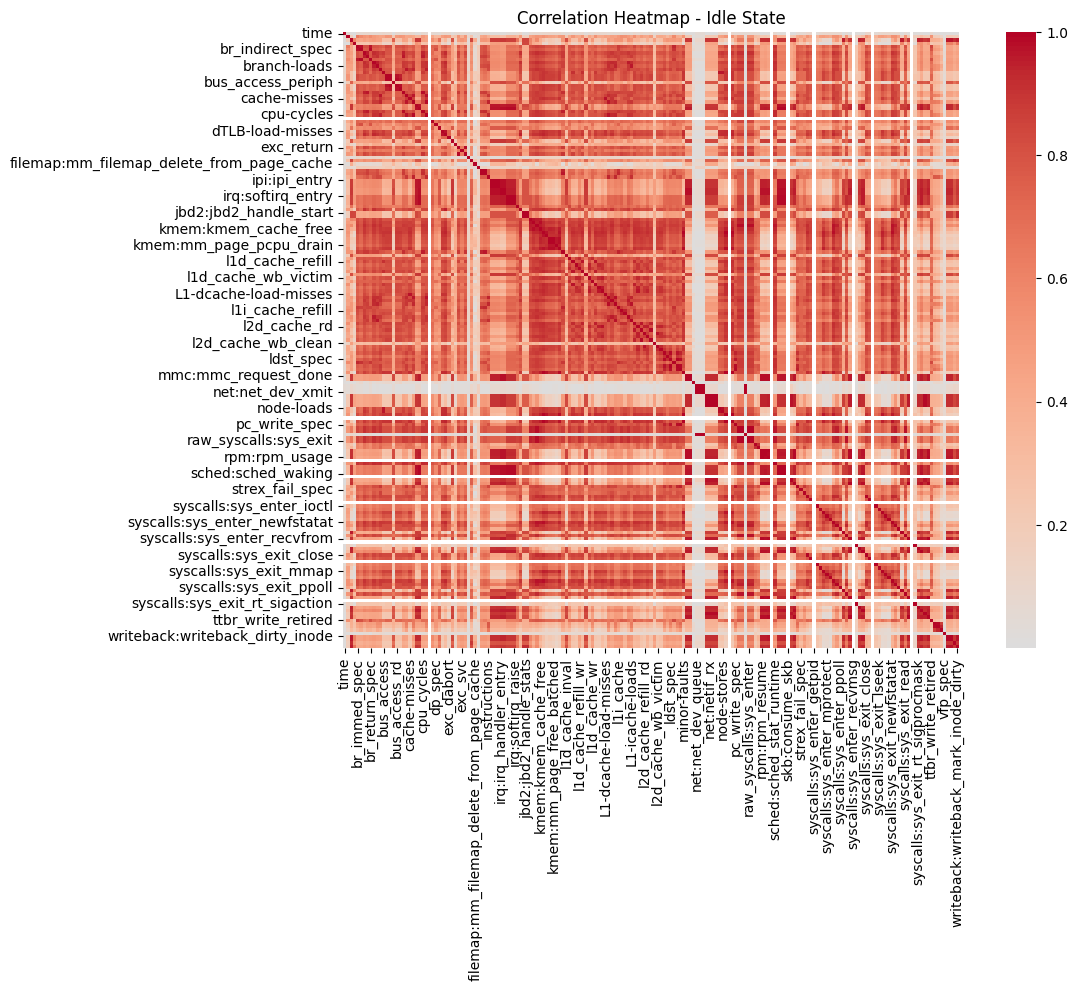

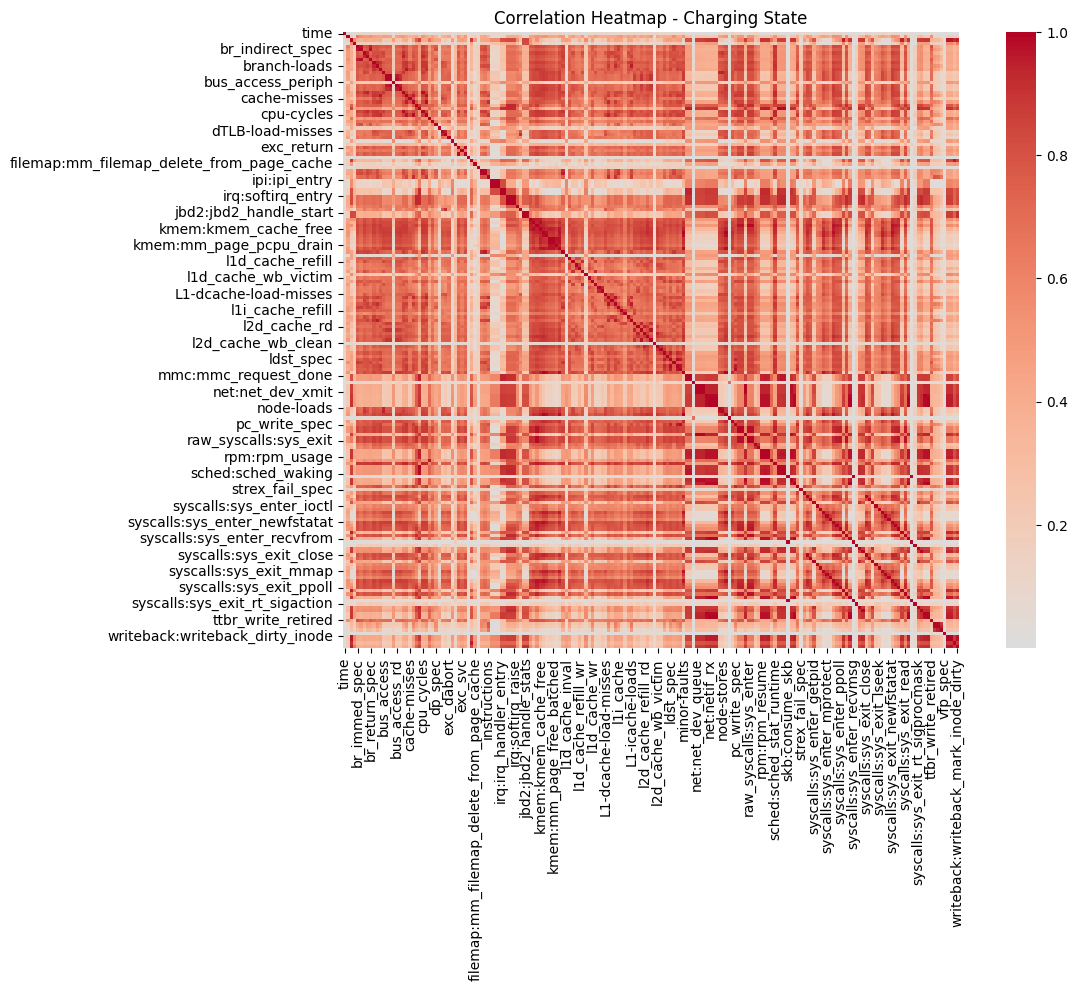

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_idle, cmap="coolwarm", center=0, square=True, cbar=True)
plt.title("Correlation Heatmap - Idle State")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(corr_charging, cmap="coolwarm", center=0, square=True, cbar=True)
plt.title("Correlation Heatmap - Charging State")
plt.show()

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]

df

In [ ]:
df

,time,ase_spec,block:block_dirty_buffer,block:block_touch_buffer,br_immed_spec,br_indirect_spec,br_mis_pred,br_pred,br_return_spec,branch-load-misses,...,vfp_spec,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_start,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,State,Attack,Attack-Group,Label,interface
0,5.004939,9029495,1929,8261,1678952554,303299535,66542962,1868029046,213301478,66095843,...,343006,2315,2315,1277,3592,Charging,backdoor,host-attack,attack,any
1,10.064901,10016259,1051,7013,1666190361,340888773,54385487,1804351108,234862246,59483337,...,256981,1083,1083,0,1919,Charging,backdoor,host-attack,attack,any
2,15.120850,6899022,1764,5287,1119854098,221931792,45379062,1333747556,152076203,47066188,...,262985,2264,2264,1186,3450,Charging,backdoor,host-attack,attack,any
3,20.180852,5553413,0,4082,891012454,187291331,30784154,960199295,135489185,32331880,...,258282,0,0,0,0,Charging,backdoor,host-attack,attack,any
4,25.240729,7368832,0,3952,828411568,168333323,31492308,954315338,116279093,27029351,...,240410,0,0,0,0,Charging,backdoor,host-attack,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,5808.438729,1333391,0,4870,548448137,125712403,20045463,774606880,91566919,13196694,...,20620,1116,1116,0,1530,idle,backdoor,host-attack,attack,any
2296,5813.510716,1127358,1385,7317,731303591,166917862,27275497,812761658,126554805,29088235,...,58625,1433,1433,0,2414,idle,backdoor,host-attack,attack,any
2297,5818.574812,6370769,1805,5235,903465922,167198249,29508476,970623760,119869529,29286778,...,32414,2188,2188,1240,3428,idle,backdoor,host-attack,attack,any
2298,5823.638711,7294614,0,4132,1125273818,226655745,32101953,1242123316,168648139,30566152,...,64175,0,0,0,0,idle,backdoor,host-attack,attack,any


In [ ]:
from google.colab import files

# Save DataFrame as CSV
df.to_csv("hpc_dataset.csv", index=False)

# Download the file
files.download("hpc_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>